In [308]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

In [309]:
# method to read data from excel file
def read_plane_data(file_name):
    df_planes = pd.read_excel(file_name)
    return df_planes

df = read_plane_data('airplane data.xlsx')

print('Here are your plane choices:')
print(df['aircraft_type'])

Here are your plane choices:
0                        A220-300
1              Bombardier CRJ-900
2                Beechcraft 1900D
3            Boeing 737-300 (733)
4      Airbus A319 (319) Layout 1
5    Embraer E-175 (E75) Layout 1
6           Airbus A320-200 (320)
7         Boeing 737-700 Layout 2
8                ATR 72-600 (ATR)
9            Boeing 717-200 (717)
Name: aircraft_type, dtype: object


In [310]:
plane_choice = input("Input the number corresponding to the plane you'd like to simulate:")    

Input the number corresponding to the plane you'd like to simulate: 5


In [311]:
plane_type = df.loc[int(plane_choice)].at['aircraft_type']
print('You selected:', plane_type)

You selected: Embraer E-175 (E75) Layout 1


In [312]:
def seat_params_info(df, plane_num):
    """Function to gather information from table regarding seat dimensions and return a list of tuples."""
    seat_width_economy = df.loc[int(plane_num)].at['seat width - economy']
    seat_depth_economy = df.loc[int(plane_num)].at['seat depth - economy']
    seat_param_economy = seat_width_economy, seat_depth_economy

    seat_width_business = df.loc[int(plane_num)].at['seat width - business']
    seat_depth_business = df.loc[int(plane_num)].at['seat depth - business']
    seat_param_business = seat_width_business, seat_depth_business

    seat_width_1stclass = df.loc[int(plane_num)].at['seat width - first class']
    seat_depth_1stclass = df.loc[int(plane_num)].at['seat depth - first class']
    seat_param_1stclass = seat_width_1stclass, seat_depth_1stclass

    seat_params = [seat_param_economy, seat_param_business, seat_param_1stclass]

    return seat_params

seat_params_info(df, plane_choice)

[(18.25, 31), (18.25, 34.0), (20.0, 37.0)]

In [313]:
def num_of_seats_info(df, plane_num):
    """Function to gather information from table regarding number of seats and return a tuple."""
    econ = df.at[int(plane_num), "total seats - economy"]
    bus = df.at[int(plane_num), "total seats - business"]
    first = df.at[int(plane_num), "total seats - first class"]
    
    num_of_seats = econ, bus, first

    return num_of_seats

num_of_seats_info(df, plane_choice)

(76, 12.0, 12)

In [314]:
def seat_arrange_info(df, plane_num):
    """Function to gather information from table regarding seat arrangement and return a list."""
    seat_arrange_econ = df.loc[int(plane_num)].at['seat arrangement - economy']

    seat_arrange_bus = df.loc[int(plane_num)].at['seat arrangement - business']
    
    seat_arrange_1st = df.loc[int(plane_num)].at['seat arrangement - first class']
    
    seat_arrange = [seat_arrange_econ, seat_arrange_bus, seat_arrange_1st]

    return seat_arrange

seat_arrange_info(df, plane_choice)

['2 2', '2 2', '1 2']

In [350]:
from Cell2D import Cell2D

class Plane(Cell2D):
    def __init__(self, seat_params, num_of_seats, seat_arrange):
        """Initializing seat dimensions, number of seats for each 'class' of plane and the seat arrangement in each 'class' of the plane
        from the tuple or list passed to the __init__ method for each corresponding characteristic of the plane."""
        self.seat_param_economy = seat_params[0]
        self.seat_param_business = seat_params[1]
        self.seat_param_firstclass = seat_params[2]

        self.num_of_seats_economy = num_of_seats[0]
        self.num_of_seats_business = num_of_seats[1]
        self.num_of_seats_firstclass = num_of_seats[2]

        self.seat_arrange_economy = seat_arrange[0]
        self.seat_arrange_business = seat_arrange[1]
        self.seat_arrange_firstclass = seat_arrange[2]

    def draw_sect_of_plane(self, ax, seat_type, start_y, aisle_gap=5, padding = 1):
        """Method to draw a section of the plane from the information passed to the method. The seat_type parameter is a tuple with the data in
        the tuple stored as follows: seats per column, seats per row, number of rows, seat width, seat pitch."""
        seats_per_col = seat_type[0]
        seats_per_row = seat_type[1]
        num_rows = seat_type[2]
        seat_width = seat_type[3]
        leg_room = seat_type[4] - seat_type[3]
        seat_depth = 18*0.2
        
        y = start_y
        
        for row in range(num_rows):
            x = 0
            
            for seat in range(seats_per_col[0]):
                rect = patches.Rectangle((x, y), seat_depth, seat_width, edgecolor='black', facecolor='grey')
                ax.add_patch(rect)

                x += seat_depth + padding

            #make aisle
            x += aisle_gap

            for seat in range(seats_per_col[2]):
                rect = patches.Rectangle((x, y), seat_depth, seat_width, edgecolor='black', facecolor='grey')
                ax.add_patch(rect)
            
                x += seat_depth + padding
            
            y += leg_room + seat_width

    def draw_plane_find_parameters(self, seat_dims, seat_arrangement, num_of_seats):
        """This method takes a given parameter and extracts the useful data to obtain the seats per column, seats per row, number of rows, seat width,
        and seat pitch for the data (or class) passed to the method and returns a tuple to be passed as a parameter to the draw_set_of_plane method."""
        seats_per_col = seat_arrangement.split(' ')
            
        for i, num in enumerate(seats_per_col):
            seats_per_col[i] = int(num)

        dummy_var = seats_per_col[len(seats_per_col)//2]
        seats_per_col[len(seats_per_col)//2] = 0
        seats_per_col.append(dummy_var)
        
        seats_in_row = sum(seats_per_col)
        num_of_rows = math.ceil(num_of_seats/seats_in_row)

        seat_width = seat_dims[0] * 0.2
        leg_room = seat_dims[1] * 0.2

        return seats_per_col, seats_in_row, num_of_rows, seat_width, leg_room
    
    def draw_plane(self):
        """The draw_plane method calls on other methods in the plane class to gather the data needed to draw each class of the plane. It then 
        calls the method to draw each section of the plane."""
        fig, ax = plt.subplots()
        padding = 1
        current_y = 0

        # economy seats
        economy_class = self.draw_plane_find_parameters(self.seat_param_economy, self.seat_arrange_economy, self.num_of_seats_economy)
        self.draw_sect_of_plane(ax, economy_class, current_y)
        current_y += economy_class[2] * (economy_class[4])
        plane_width = economy_class[3] * (economy_class[1] + padding) +5

        # business seats
        if self.num_of_seats_business > 0:
            business_class = self.draw_plane_find_parameters(self.seat_param_business, self.seat_arrange_business, self.num_of_seats_business)
            fixer = 0
            if business_class[1] != economy_class[1]:
                fixer = (economy_class[1] - business_class[1]) * (18*0.2 - padding)
            business_width = business_class[3] * (business_class[1] + padding)
            business_aisle_width = plane_width - business_width + fixer
            self.draw_sect_of_plane(ax, business_class, current_y, business_aisle_width)
            current_y += business_class[2] * (business_class[4])
        
        # first class seats        
        if self.num_of_seats_firstclass > 0:
            first_class = self.draw_plane_find_parameters(self.seat_param_firstclass, self.seat_arrange_firstclass, self.num_of_seats_firstclass)
            fixer = 0
            if first_class[1] != economy_class[1]:
                fixer = (economy_class[1] - first_class[1]) * (18*0.2 - padding)
            first_class_width = first_class[3] * (first_class[1] + padding)
            first_class_aisle_width = plane_width - first_class_width + fixer
            self.draw_sect_of_plane(ax, first_class, current_y, first_class_aisle_width)
            current_y += first_class[2] * (first_class[4])        

        fig.set_size_inches((plane_width + 5) * 0.1, current_y * 0.1)
        plt.axis('equal')
        plt.axis('off')
        plt.show()

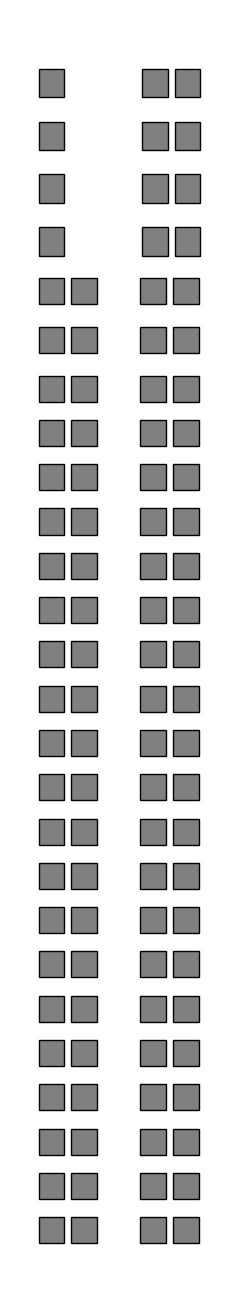

In [352]:
plane = Plane(seat_params_info(df, plane_choice), num_of_seats_info(df, plane_choice), seat_arrange_info(df, plane_choice))

plane.draw_plane()